## Superstore Sales Data Analysis
    1. Superstore Analysis Overview 
    2. Customer Analysis 
    3. Customer Segmentation 
    4. Revenue by Customer Segment 
    5. Data-Driven Customer Loyalty 
    6. Customer Sales Insights

In [4]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv("Sample_Superstore.csv")

In [24]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [32]:
#Fillimg Null Values
#df["Postal code"].fillna(0, inplace = True)
#df["Postal code"] = df["Postal code"].astype(int)
#df.info()

In [40]:
#Checking for Duplicates
if df.duplicated().sum() > 0: #
    print("Duplicates exists")
else:
    print("No Duplicates Found")

No Duplicates Found


In [52]:
#Customer Segmentation
#Find the unique value
types_of_Customers = df['Segment'].unique()
types_of_Customers

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [72]:
number_of_customers = df['Segment'].value_counts().reset_index()
number_of_customers = number_of_customers.rename(columns={'Segment': 'Type of Customer'})
number_of_customers

,Type of Customer,count
0,Consumer,5191
1,Corporate,3020
2,Home Office,1783


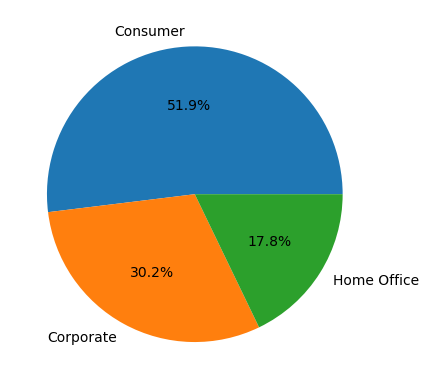

In [76]:
plt.pie(number_of_customers['count'], labels = number_of_customers['Type of Customer'], autopct ='%1.1f%%')
plt.show() 

-How to balance resource allocation to the segments to maximize growth \
-Integrate customer data with sales figures to identify which segments generate the most reveneu per customer \
-Segment customers by purchase frequency and quantity to understand the buying behaviour \
-Analyze Customer acquisition cost (CAC), satisfaction, and turn rate to create a customer segmentation model 

In [96]:
Sales_per_segment = df.groupby('Segment')['Sales'].sum().reset_index()
Sales_per_segment = Sales_per_segment.rename(columns={'Segment': 'Type of Customer', 'Sales': 'Total Sales' })
Sales_per_segment

,Type of Customer,Total Sales
0,Consumer,1.161401e+06
1,Corporate,7.061464e+05
2,Home Office,4.296531e+05


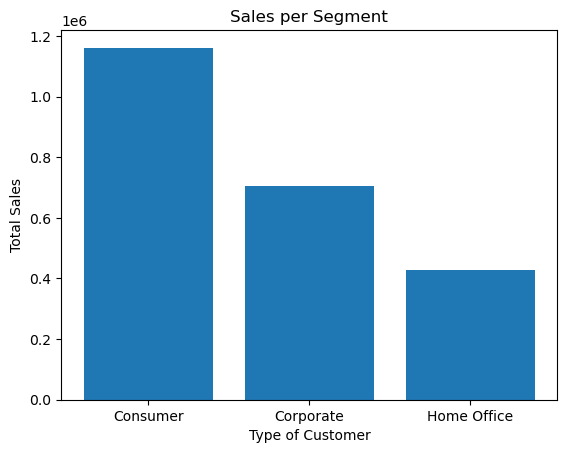

In [102]:
plt.bar(Sales_per_segment['Type of Customer'], Sales_per_segment['Total Sales'])
plt.title('Sales per Segment')
plt.xlabel('Type of Customer')
plt.ylabel('Total Sales')
plt.show()

In [104]:
#Which segment has higher Customer life Time Value(CLTV) and spend market research accordingly
#Customer Loyalty Program
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [150]:
Customers_order_frequency = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Order ID'].count().reset_index()
Customers_order_frequency = Customers_order_frequency.rename(columns={'Order ID':'Total Order'})
repeat_customers = Customers_order_frequency[Customers_order_frequency['Total Order'] >= 1]
repeat_customers_sorted = repeat_customers.sort_values(by = 'Total Order', ascending = False)
repeat_customers_sorted.head(12).reset_index(drop = True)

,Customer ID,Customer Name,Segment,Total Order
0,WB-21850,William Brown,Consumer,37
1,PP-18955,Paul Prost,Home Office,34
2,JL-15835,John Lee,Consumer,34
3,MA-17560,Matt Abelman,Home Office,34
4,SV-20365,Seth Vernon,Consumer,32
5,JD-15895,Jonathan Doherty,Corporate,32
6,CK-12205,Chloris Kastensmidt,Consumer,32
7,EH-13765,Edward Hooks,Corporate,32
8,EP-13915,Emily Phan,Consumer,31
9,ZC-21910,Zuschuss Carroll,Consumer,31


In [156]:
#Identify the top sending customers
Customer_sales = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Sales'].sum().reset_index()
Customer_sales = Customer_sales.rename(columns={'Sales':'Total Sales'})
top_sepending_customers = top_sepending_customers.sort_values(by = 'Total Sales', ascending = False)
top_sepending_customers.head(12).reset_index(drop = True)

,Customer ID,Customer Name,Segment,Total Sales
0,SM-20320,Sean Miller,Home Office,25043.050
1,TC-20980,Tamara Chand,Corporate,19052.218
2,RB-19360,Raymond Buch,Consumer,15117.339
3,TA-21385,Tom Ashbrook,Home Office,14595.620
4,AB-10105,Adrian Barton,Consumer,14473.571
5,KL-16645,Ken Lonsdale,Consumer,14175.229
6,SC-20095,Sanjit Chand,Consumer,14142.334
7,HL-15040,Hunter Lopez,Consumer,12873.298
8,SE-20110,Sanjit Engle,Consumer,12209.438
9,CC-12370,Christopher Conant,Consumer,12129.072


In [194]:
#Find out which shipping methods are most reliable and satisfy customers
Shiping_model = df['Ship Mode'].value_counts().reset_index()
Shiping_model = Shiping_model.rename(columns={'Ship Mode': 'Mode of Shipment'})
Shiping_model

,Mode of Shipment,count
0,Standard Class,5968
1,Second Class,1945
2,First Class,1538
3,Same Day,543


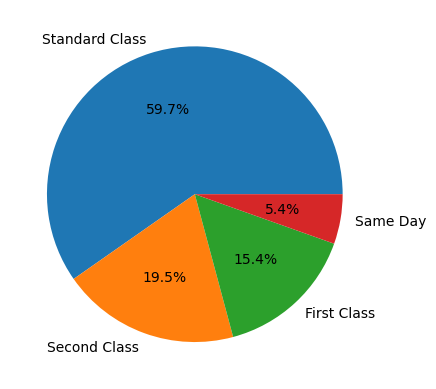

In [196]:
plt.pie(Shiping_model['count'], labels = Shiping_model['Mode of Shipment'], autopct ='%1.1f%%')
plt.show()

Recommends customers that most popular shipping method is standard class

In [215]:
state = df['State'].value_counts().reset_index()
state = State.rename(columns={'index': 'State', 'State': 'Number of Customers'})
state.head(15)

,Number of Customers,count
0,California,2001
1,New York,1128
2,Texas,985
3,Pennsylvania,587
4,Washington,506
5,Illinois,492
6,Ohio,469
7,Florida,383
8,Michigan,255
9,North Carolina,249


In [213]:
city = df['City'].value_counts().reset_index()
city = city.rename(columns={'index': 'City', 'City': 'Number of Customers'})
city.head(15)

,Number of Customers,count
0,New York City,915
1,Los Angeles,747
2,Philadelphia,537
3,San Francisco,510
4,Seattle,428
5,Houston,377
6,Chicago,314
7,Columbus,222
8,San Diego,170
9,Springfield,163


In [219]:
#Geographical analysis
# Which state is performing the best, and which is performing the least
sales_per_state= df.groupby(['State'])['Sales'].sum().reset_index()
sales_per_state = sales_per_state.rename(columns={'Sales':'Total Sales'})
sales_per_state = sales_per_state.sort_values(by = 'Total Sales', ascending = False)
sales_per_state.head(12).reset_index(drop = True)

,State,Total Sales
0,California,457687.6315
1,New York,310876.2710
2,Texas,170188.0458
3,Washington,138641.2700
4,Pennsylvania,116511.9140
5,Florida,89473.7080
6,Illinois,80166.1010
7,Ohio,78258.1360
8,Michigan,76269.6140
9,Virginia,70636.7200


In [217]:
# Which city is performing the best, and which is performing the least
sales_per_city= df.groupby(['City'])['Sales'].sum().reset_index()
sales_per_city = sales_per_city.rename(columns={'Sales':'Total Sales'})
sales_per_city = sales_per_city.sort_values(by = 'Total Sales', ascending = False)
sales_per_city.head(12).reset_index(drop = True)

,City,Total Sales
0,New York City,256368.1610
1,Los Angeles,175851.3410
2,Seattle,119540.7420
3,San Francisco,112669.0920
4,Philadelphia,109077.0130
5,Houston,64504.7604
6,Chicago,48539.5410
7,San Diego,47521.0290
8,Jacksonville,44713.1830
9,Springfield,43054.3420


Find the top performing products

In [230]:
products = df['Category'].unique()
products


array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [232]:
products_subcategory = df['Sub-Category'].unique()
products_subcategory

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [240]:
subcategory_count= df.groupby(['Category'])['Sub-Category'].nunique().reset_index()
subcategory_count = subcategory_count.sort_values(by = 'Sub-Category', ascending = False)
subcategory_count

,Category,Sub-Category
1,Office Supplies,9
0,Furniture,4
2,Technology,4


In [246]:
#Top Performing Sub-Category
subcategory_count_sales= df.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()
subcategory_count_sales = subcategory_count_sales.sort_values(by = 'Sales', ascending = False)
subcategory_count_sales

,Category,Sub-Category,Sales
16,Technology,Phones,330007.0540
1,Furniture,Chairs,328449.1030
11,Office Supplies,Storage,223843.6080
3,Furniture,Tables,206965.5320
6,Office Supplies,Binders,203412.7330
15,Technology,Machines,189238.6310
13,Technology,Accessories,167380.3180
14,Technology,Copiers,149528.0300
0,Furniture,Bookcases,114879.9963
4,Office Supplies,Appliances,107532.1610


In [252]:
#Which category has the most sales
product_category= df.groupby(['Category'])['Sales'].sum().reset_index()
product_category = product_category.sort_values(by = 'Sales', ascending = False)
product_category

,Category,Sales
2,Technology,836154.0330
0,Furniture,741999.7953
1,Office Supplies,719047.0320


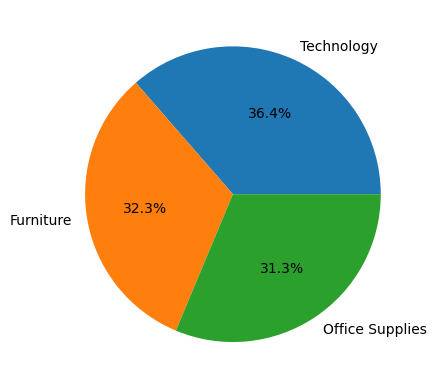

In [254]:
plt.pie(product_category['Sales'], labels = product_category['Category'], autopct ='%1.1f%%')
plt.show()

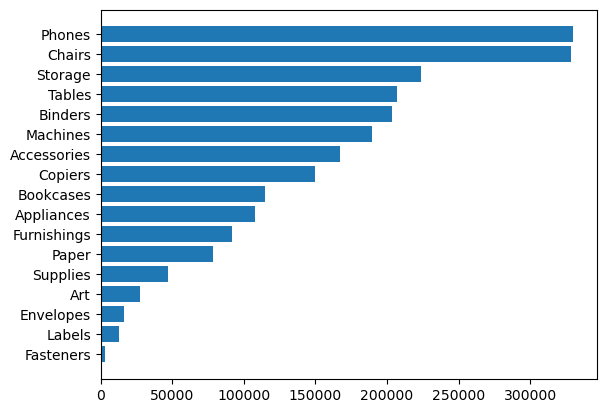

In [268]:
#The most popular sub-category items
subcategory_count_sales = subcategory_count_sales.sort_values(by = 'Sales', ascending = True)
plt.barh(subcategory_count_sales['Sub-Category'], subcategory_count_sales['Sales'])
plt.show()

In [282]:
#Growth Chart (yearly, quarterly and monthly)
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst = False)
yearly_sales = df.groupby(df['Order Date'].dt.year)['Sales'].sum()
yearly_sales = yearly_sales.reset_index()
yearly_sales = yearly_sales.rename(columns ={'Order Date':'Year', 'Sales':'Total Sales'})
yearly_sales

,Year,Total Sales
0,2014,484247.4981
1,2015,470532.5090
2,2016,609205.5980
3,2017,733215.2552


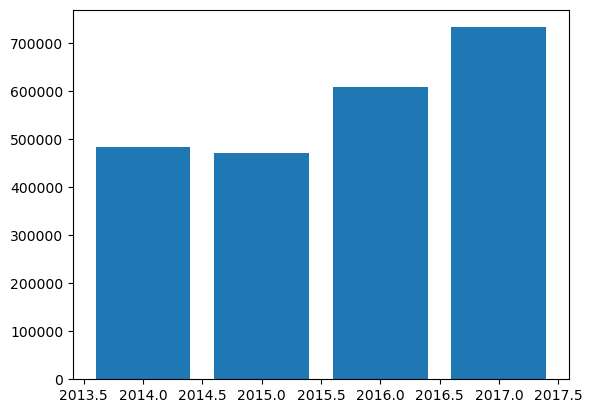

In [284]:
plt.bar(yearly_sales['Year'], yearly_sales['Total Sales'])
plt.show()

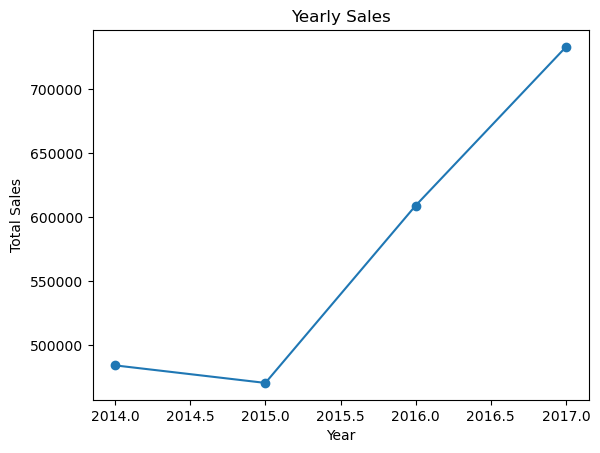

In [288]:
plt.plot(yearly_sales['Year'], yearly_sales['Total Sales'], marker='o', linestyle = '-')
plt.title('Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()

In [298]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst = False)
yearly_sales = df[df['Order Date'].dt.year == 2017]
quarterly_sales = yearly_sales.resample('QE', on='Order Date')['Sales'].sum()
quarterly_sales = quarterly_sales.reset_index()
quarterly_sales = quarterly_sales.rename(columns={'Order Date':'Quarter', 'Sales':'Total Sales'})
quarterly_sales

,Quarter,Total Sales
0,2017-03-31,123144.8602
1,2017-06-30,133764.3720
2,2017-09-30,196251.9560
3,2017-12-31,280054.0670


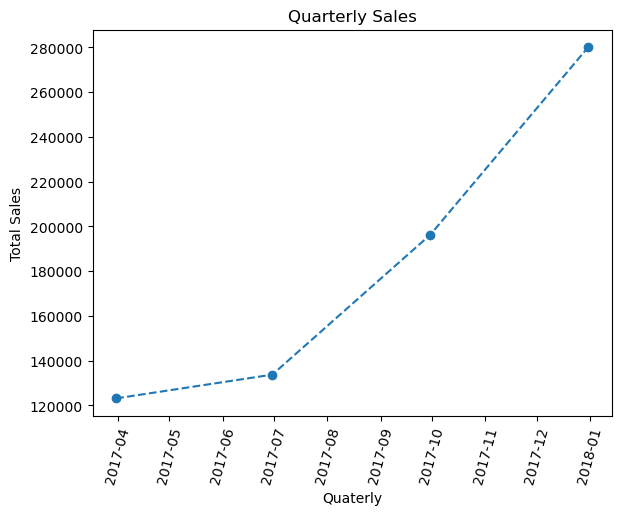

In [310]:
#Seassonal Trend
plt.plot(quarterly_sales['Quarter'], quarterly_sales['Total Sales'], marker='o', linestyle = '--')
plt.title('Quarterly Sales')
plt.xlabel('Quaterly',)
plt.ylabel('Total Sales')

plt.tight_layout()
plt.xticks(rotation = 75)
plt.show()

In [318]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst = False)
Monthly_sales = df[df['Order Date'].dt.year == 2017]
Monthly_sales = Monthly_sales.resample('ME', on='Order Date')['Sales'].sum()
Monthly_sales = Monthly_sales.reset_index()
Monthly_sales = Monthly_sales.rename(columns={'Order Date':'Monthly', 'Sales':'Total Sales'})
Monthly_sales

,Monthly,Total Sales
0,2017-01-31,43971.3740
1,2017-02-28,20301.1334
2,2017-03-31,58872.3528
3,2017-04-30,36521.5361
4,2017-05-31,44261.1102
5,2017-06-30,52981.7257
6,2017-07-31,45264.4160
7,2017-08-31,63120.8880
8,2017-09-30,87866.6520
9,2017-10-31,77776.9232


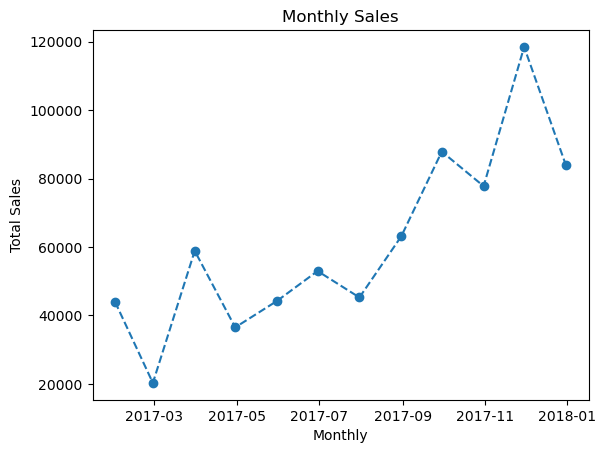

In [322]:
#Seassonal Trend
plt.plot(Monthly_sales['Monthly'], Monthly_sales['Total Sales'], marker='o', linestyle = '--')
plt.title('Monthly Sales')
plt.xlabel('Monthly',)
plt.ylabel('Total Sales')

#plt.tight_layout()
#plt.xticks(rotation = 75)
plt.show()

There is a seassonal influence on sales.  

Mapping Sales By States

In [346]:
State_name = df["State"].unique()
State_name

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

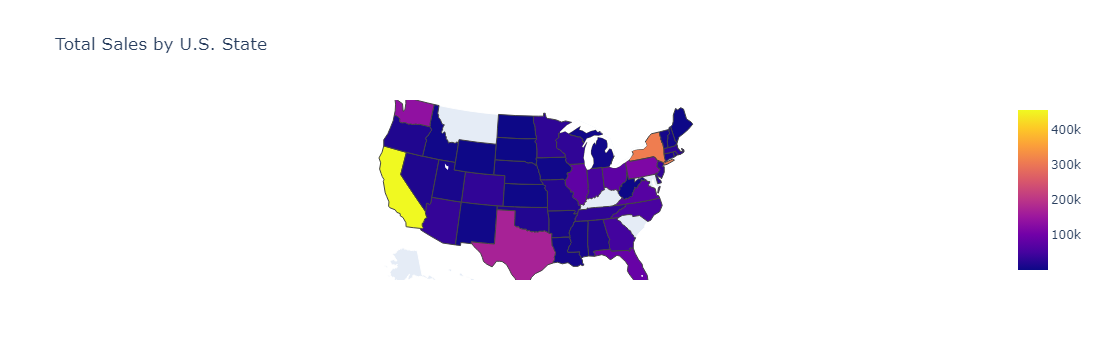

In [388]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

#Create a mapping for all 50 states
all_state_mapping = {
    'Kentucky':'', 'California':'CA', 'Florida':'FL', 'North Carolina':'NC',
       'Washington':'WA', 'Texas':'TX', 'Wisconsin':'WI', 'Utah':'UT', 'Nebraska':'NE',
       'Pennsylvania':'PA', 'Illinois':'IL', 'Minnesota':'MN', 'Michigan':'MI', 'Delaware':'DE',
       'Indiana':'IN', 'New York':'NY', 'Arizona':'AZ', 'Virginia':'VA', 'Tennessee':'TN',
       'Alabama':'AL', 'South Carolina':'C', 'Oregon':'OR', 'Colorado':'CO', 'Iowa':'IA', 'Ohio':'OH',
       'Missouri':'MO', 'Oklahoma':'OK', 'New Mexico':'NM', 'Louisiana':'LA', 'Connecticut':'CT',
       'New Jersey':'NJ', 'Massachusetts':'MA', 'Georgia':'GA', 'Nevada':'NV', 'Rhode Island':'RI',
       'Mississippi':'MS', 'Arkansas':'AR', 'Montana':'MI', 'New Hampshire':'NH', 'Maryland':'MA',
       'District of Columbia':'DC', 'Kansas':'KS', 'Vermont':'VT', 'Maine':'ME',
       'South Dakota':'SD', 'Idaho':'ID', 'North Dakota':'ND', 'Wyoming':'WY',
       'West Virginia':'WV'}

#Add abbreviation column to the dataframe
df['Abbreviation'] = df['State'].map(all_state_mapping)

#Group by State and calulate the sun of sales
sum_of_sales = df.groupby('State')['Sales'].sum().reset_index()

#Add Abbreviation to sum of sales
sum_of_sales['Abbreviation'] = sum_of_sales['State']. map(all_state_mapping)

#Create a choropleth map using Plotly
fig = go.Figure(data=go.Choropleth(
    locations = sum_of_sales['Abbreviation'],
    locationmode = 'USA-states', 
    z=sum_of_sales['Sales'],
    hoverinfo = 'location+z',
    showscale = True
))

fig.update_geos(projection_type= "albers usa")
fig.update_layout(
    geo_scope = 'usa',
    title='Total Sales by U.S. State'
)

Conclusion\
California is doing the best, and then New York.

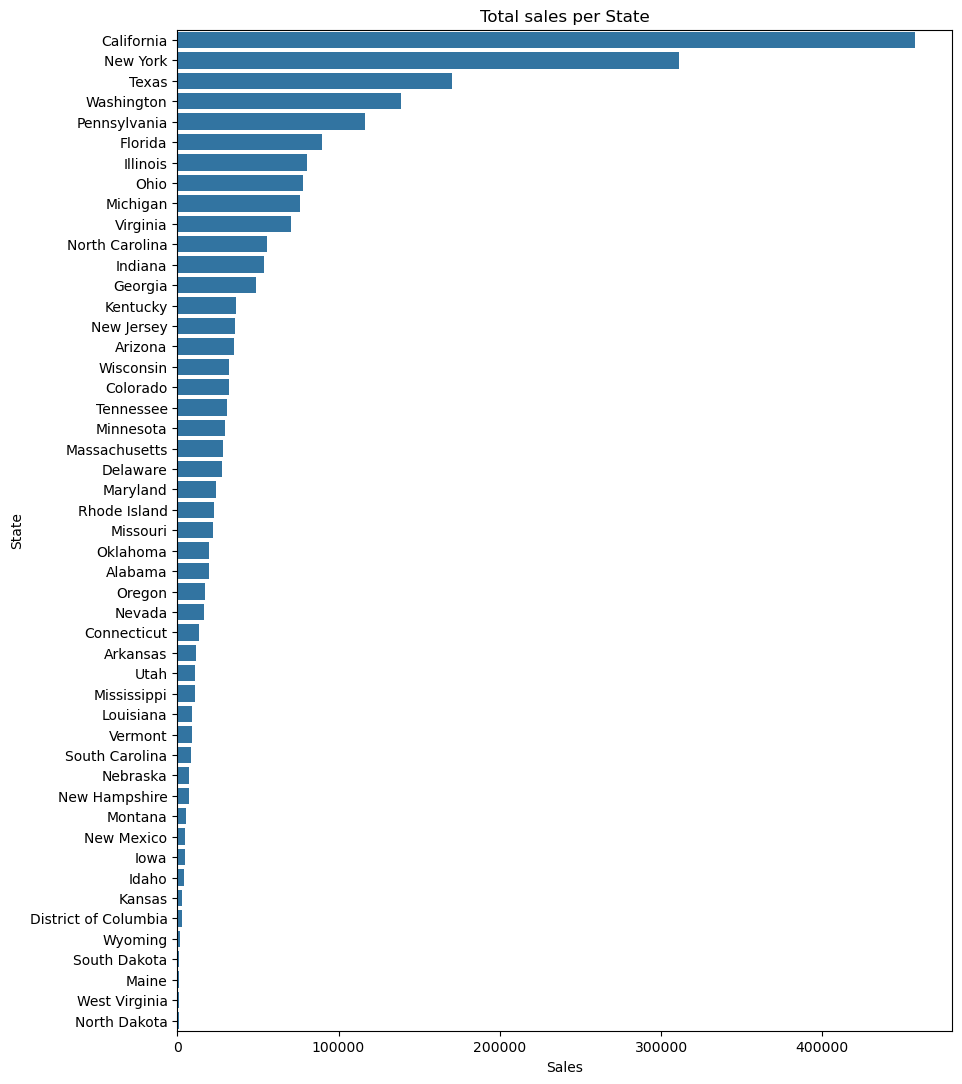

In [406]:
#Group by states and calculate the sum of sales
sales_per_states = df.groupby(['State'])['Sales'].sum().reset_index()

#Sort the data frame by sales in descending order
sales_per_states = sales_per_states.sort_values(by='Sales', ascending = False)

#Create a horizontal bar graph
plt.figure(figsize=(10,13))
ax = sns.barplot(x='Sales', y='State', data = sales_per_states, errorbar= None)

plt.title('Total sales per State')
plt.show()

California is doing the best, and North Dakota iss doing worst.

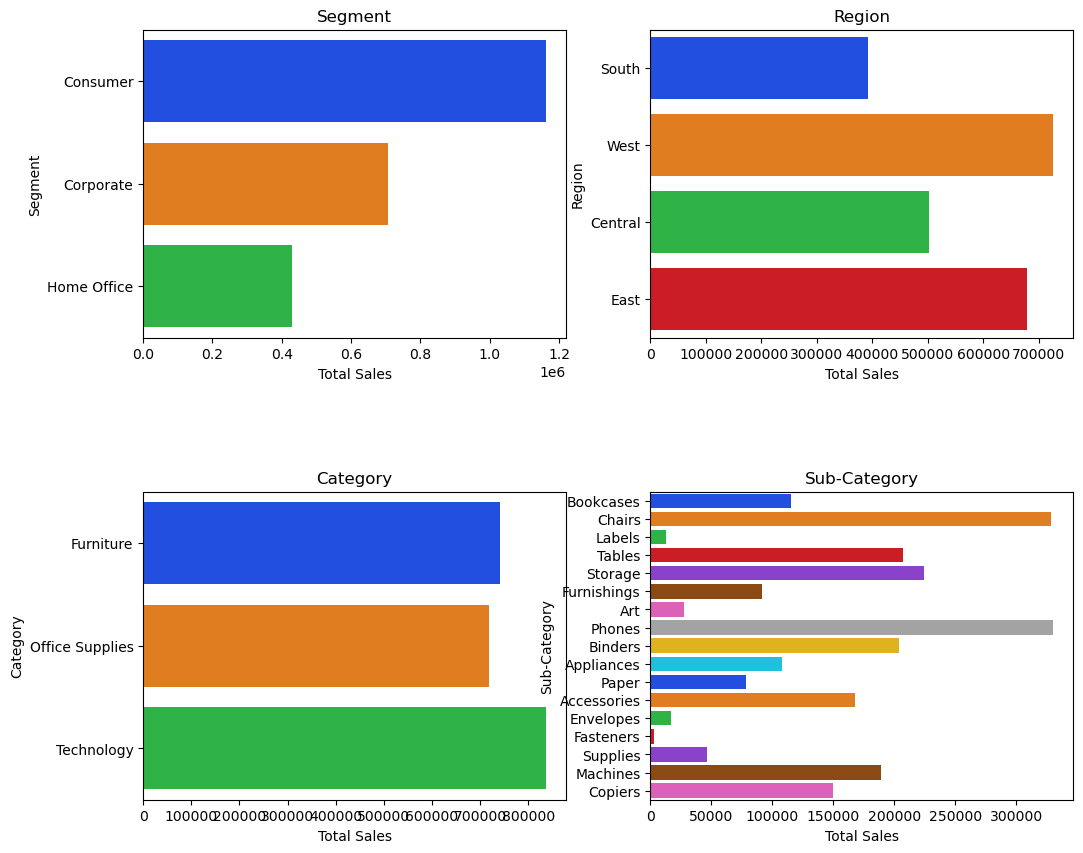

In [479]:
#Create subplots 
fig, axes = plt.subplots(2,2, figsize=(12,10))
fig.subplots_adjust(hspace = 0.5)
columns=['Segment', 'Region', 'Category', 'Sub-Category']

for i, column in enumerate(columns):
    ax = axes[i //2, i % 2]
    sns.barplot(x='Sales', y =column, data = df, estimator= np.sum, errorbar=None, palette='bright', ax=ax, hue=column)
    ax.set_xlabel('Total Sales')
    ax.set_ylabel(column)
    ax.set_title(column)

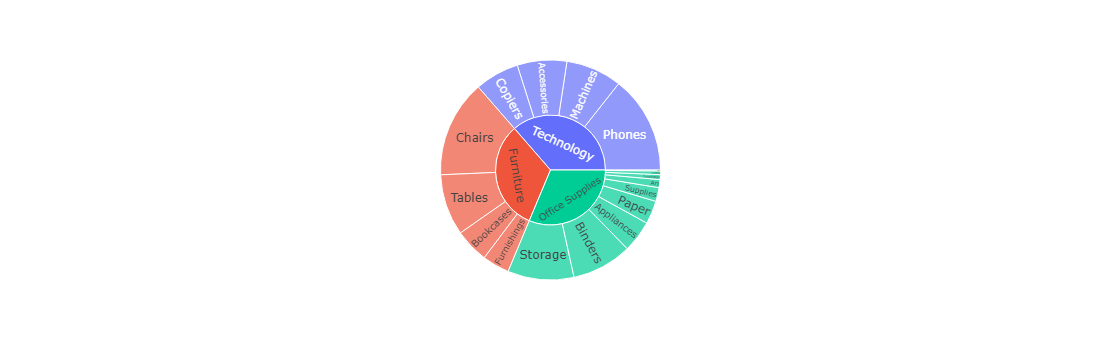

In [417]:
import plotly.express as px
#summarize the ssale sdata by Category and Sub Category
df_summary = df.groupby(['Category','Sub-Category'])['Sales'].sum().reset_index()

#Create a nested pie chart
fig=px.sunburst(
    df_summary, path=['Category', 'Sub-Category'], values='Sales')

fig.show()